# Imports and font/color setup

In [1]:
import random
import os

In [2]:
import pandas as pd, numpy as np, string, re
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.font_manager as fm 
from datetime import timedelta, datetime as dt
import matplotlib.gridspec as gridspec
%matplotlib inline
# %matplotlib notebook

In [3]:
pd.set_option('display.max_columns', 30)

In [4]:
family = 'DejaVu Sans'
title_font = fm.FontProperties(family=family, style='normal', size=20, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')
ticks_font_h = fm.FontProperties(family=family, style='normal', size=10.5, weight='normal', stretch='normal')

In [5]:
def get_colors(cmap, n, start=0.0, stop=1.0, alpha=1.0, reverse=False):
    import matplotlib.cm as cm, numpy as np 
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [6]:
plt.style.use('fivethirtyeight')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print('\n'.join(color for color in colors)) 

#008fd5
#fc4f30
#e5ae38
#6d904f
#8b8b8b
#810f7c


In [7]:
users = []
scrobbles_file_names = []

user_dict = {}
user_dicts = []

In [8]:
for root, dirs, files in os.walk("../../Datasets/lastfm-20210829/", topdown=True):
    for dir_name in dirs:
        users.append(dir_name)
    for file_name in files:
        scrobbles_file_names.append(file_name)


In [9]:
for user in users:
    for file_name in scrobbles_file_names:
        
        details_dict = {}

        if file_name.split('-')[1] == user and file_name.split('-')[0] == 'scrobbles':
            user_dict[user] = file_name
            details_dict['user'] = user
            details_dict['file_name'] = file_name
            user_dicts.append(details_dict)

In [10]:
user_dict

{'woosteresque': 'scrobbles-woosteresque-1632684543.csv',
 'Twoh3ad3db0y': 'scrobbles-Twoh3ad3db0y-1630228825.csv',
 'Shubhankar0808': 'scrobbles-Shubhankar0808-1632816024.csv',
 'Dracaeryn': 'scrobbles-Dracaeryn-1632773882.csv',
 'SidSaxena': 'scrobbles-SidSaxena-1630171399.csv',
 'voresoph': 'scrobbles-voresoph-1632825524.csv',
 'dhruva93': 'scrobbles-dhruva93-1631895366.csv',
 'sam11235': 'scrobbles-sam11235-1630240335.csv',
 'axaytsg': 'scrobbles-axaytsg-1630249815.csv',
 'Rockgrenade': 'scrobbles-Rockgrenade-1630148679.csv',
 'tarun_verma08': 'scrobbles-tarun_verma08-1624153680.csv'}

In [11]:
user_dicts

[{'user': 'woosteresque',
  'file_name': 'scrobbles-woosteresque-1632684543.csv'},
 {'user': 'Twoh3ad3db0y',
  'file_name': 'scrobbles-Twoh3ad3db0y-1630228825.csv'},
 {'user': 'Shubhankar0808',
  'file_name': 'scrobbles-Shubhankar0808-1632816024.csv'},
 {'user': 'Dracaeryn', 'file_name': 'scrobbles-Dracaeryn-1632773882.csv'},
 {'user': 'SidSaxena', 'file_name': 'scrobbles-SidSaxena-1630171399.csv'},
 {'user': 'voresoph', 'file_name': 'scrobbles-voresoph-1632825524.csv'},
 {'user': 'dhruva93', 'file_name': 'scrobbles-dhruva93-1631895366.csv'},
 {'user': 'sam11235', 'file_name': 'scrobbles-sam11235-1630240335.csv'},
 {'user': 'axaytsg', 'file_name': 'scrobbles-axaytsg-1630249815.csv'},
 {'user': 'Rockgrenade', 'file_name': 'scrobbles-Rockgrenade-1630148679.csv'},
 {'user': 'tarun_verma08',
  'file_name': 'scrobbles-tarun_verma08-1624153680.csv'}]

In [12]:
username = user_dicts[0]['user']
file_name = user_dicts[0]['file_name']

# Analysis

In [13]:
scrobbles = pd.read_csv(f'../../Datasets/lastfm-20210829/{username}/{file_name}')

In [14]:
print(f"{username} Total Scrobbles: {len(scrobbles)}")
print(f"{username} Total Artists: {scrobbles['artist'].nunique()}")

woosteresque Total Scrobbles: 27536
woosteresque Total Artists: 1528


In [15]:
scrobbles['timestamp'] = pd.to_datetime(scrobbles['utc_time'])
# scrobbles = scrobbles.drop('datetime', axis=1)
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize('UTC')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_convert('Asia/Kolkata')
scrobbles['timestamp'] = scrobbles['timestamp'].dt.tz_localize(None)

In [16]:
scrobbles['year'] = scrobbles['timestamp'].apply(lambda time: time.year)
scrobbles['month'] = scrobbles['timestamp'].apply(lambda time: time.month)
scrobbles['year-month'] = scrobbles['timestamp'].apply(lambda time: '{}-{:02}'.format(time.year, time.month))
scrobbles['day'] =  scrobbles['timestamp'].apply(lambda time: time.day)
scrobbles['hour'] = scrobbles['timestamp'].apply(lambda time: time.hour)
scrobbles['dow'] = scrobbles['timestamp'].apply(lambda time: time.dayofweek)


# dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

# scrobbles['dow'] = scrobbles['dow'].map(dmap)

In [17]:
year_counts = scrobbles['year'].value_counts().sort_index()

In [18]:
year_counts = scrobbles['year'].value_counts().sort_index()
ylim = max(year_counts) + 5000

In [19]:
year_counts

2017    5402
2018    1936
2019    3540
2020    9150
2021    7508
Name: year, dtype: int64

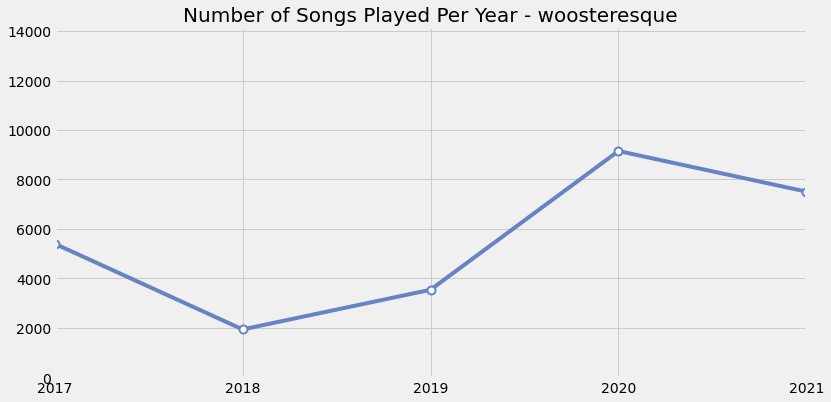

In [20]:
ax = year_counts.plot(kind='line', figsize=(12,6), linewidth=4, alpha=1, marker='o', color='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_ylim(0, ylim)
ax.set_xticks(year_counts.index)
ax.set_ylabel('', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)

ax.set_title(f'Number of Songs Played Per Year - {username}', fontproperties=title_font)

plt.savefig(f'images/{username}/scrobbles-per-year-{username}', dpi=96, bbox_inches='tight')
plt.show()

In [21]:
min_year = min(scrobbles['year'])
max_year = max(scrobbles['year'])
years = scrobbles['year'].unique()[::-1].tolist()

In [22]:
month_counts = scrobbles['month'].value_counts().sort_index()
month_counts

1     2217
2     2343
3     2626
4     2826
5     4190
6     2497
7     1751
8     2079
9     2425
10    1537
11    1658
12    1387
Name: month, dtype: int64

In [23]:
idx = []

for year in years:
    idx.append((scrobbles['month'][scrobbles['year'] == year]).value_counts().sort_index())

In [24]:
month_counts = scrobbles['year-month'].value_counts().sort_index()

date_range = pd.date_range(start=min(scrobbles['timestamp']), end=max(scrobbles['timestamp']), freq='D')
months_range = date_range.map(lambda x: str(x.date())[:-3])
index = np.unique(months_range)
month_counts = month_counts.reindex(index, fill_value=0)

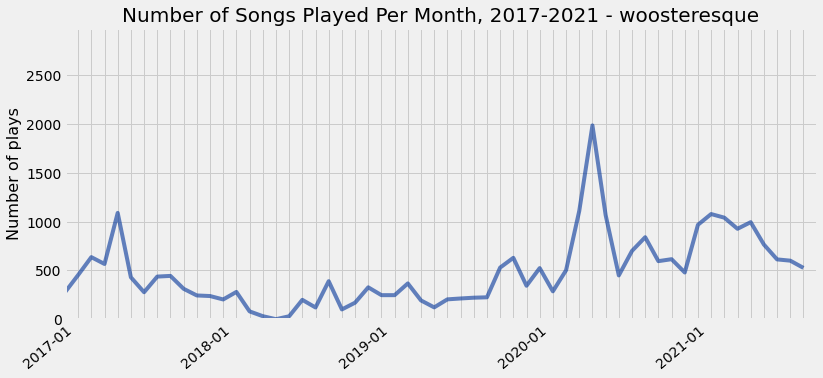

In [26]:
ylim = max(month_counts) + 1000

ax = month_counts.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=0.6, color='#003399')

xlabels = month_counts.iloc[range(0, len(month_counts), 12)].index
xlabels = [x if x in xlabels else '' for x in month_counts.index]
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=40, rotation_mode='anchor', ha='right')

ax.set_xlim((0, len(month_counts)))

ax.yaxis.grid(True)
ax.set_ylim((0,ylim))
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of Songs Played Per Month, {min_year}-{max_year} - {username}', fontproperties=title_font)

plt.savefig(f'images/{username}/scrobbles-per-month-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [27]:
dow_counts = scrobbles['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [30]:
print(dow_counts)
ylim = max(dow_counts) + 2000

Monday       3876
Tuesday      3805
Wednesday    3854
Thursday     3895
Friday       3893
Saturday     3992
Sunday       4221
Name: dow, dtype: int64


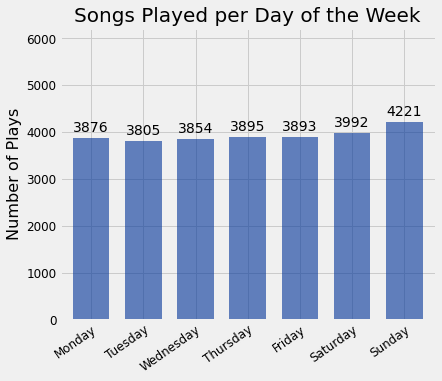

In [31]:
ax = dow_counts.plot(kind='bar', figsize=[6, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right', fontproperties=ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)

ax.set_ylim((0, ylim))
ax.set_title('Songs Played per Day of the Week', fontproperties=title_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_ylabel('Number of Plays', fontproperties=label_font)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(f'images/{username}/scrobbles-per-weekday-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [33]:
hour_counts = scrobbles['hour'].value_counts().sort_index()
ylim = max(hour_counts) + 2000

In [34]:
hour_counts = scrobbles['hour'].value_counts().sort_index()

order = hour_counts.index[6:].tolist() + hour_counts.index[:6].tolist()

ylim = max(hour_counts) + 1000

ordered_hour_counts = hour_counts[order]

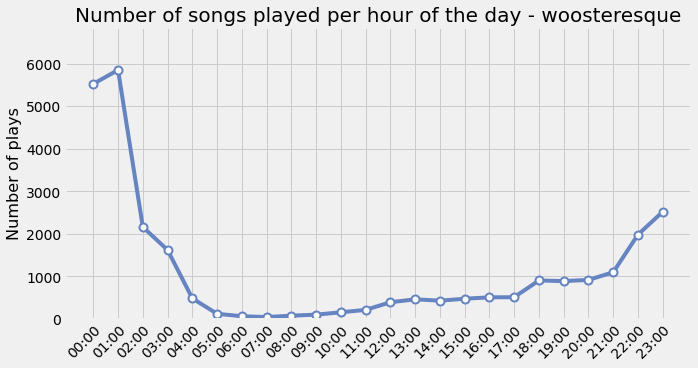

In [35]:
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.yaxis.grid(True)
ax.set_ylim((0, ylim))

ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of songs played per hour of the day - {username}', fontproperties=title_font)

plt.savefig(f'images/{username}/scrobbles-per-hour-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

/tmp/ipykernel_258/1313645579.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks)


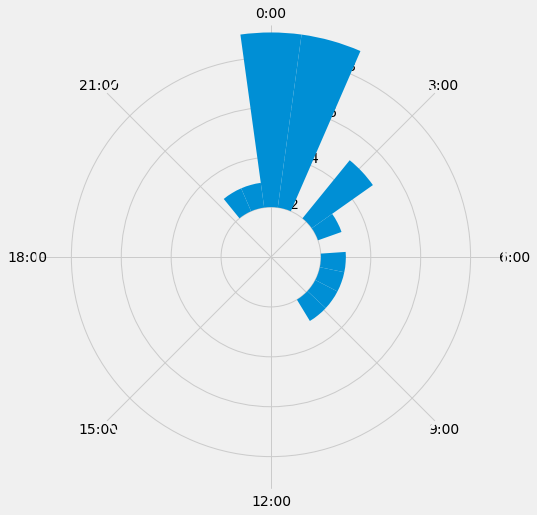

In [36]:
N = 23
bottom = 2

# create theta for 24 hours
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# make the histogram that bined on 24 hour
radii, tick = np.histogram(hour_counts, bins = 23)

# width of each bin on the plot
width = (2*np.pi) / N

# make a polar plot
plt.figure(figsize = (12, 8))
ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)

# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)

# set the label
ticks = ['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00']
ax.set_xticklabels(ticks)

plt.show()

In [805]:
day_hour_counts = scrobbles.groupby(['dow', 'hour']).count()['track']
hour_numbers = day_hour_counts.index.levels[1]
day_numbers = day_hour_counts.index.levels[0]
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [806]:
ylim = max(day_hour_counts) + 200

In [807]:
day_numbers

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='dow')

In [808]:
colors = get_colors('nipy_spectral_r', n=len(day_numbers), start=0.1, stop=0.95)

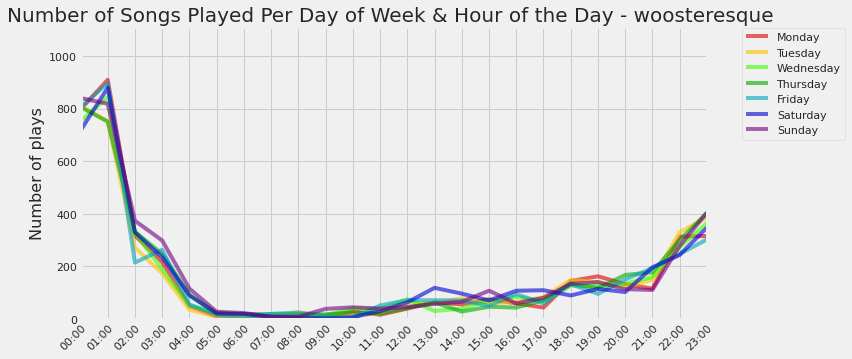

In [809]:
fig, ax = plt.subplots(figsize=[12, 8])
lines = []
for day, c in zip(day_numbers, colors):
    ax = day_hour_counts[day].plot(kind='line', figsize=[10, 5], linewidth=4, alpha=0.6, color=c)
    lines.append(day_names[day])

xlabels = hour_numbers.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim(hour_numbers[0], hour_numbers[-1])

ax.yaxis.grid(True)

ax.set_ylim([0, ylim])
ax.set_ylabel('Number of plays', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title(f'Number of Songs Played Per Day of Week & Hour of the Day - {username} ', fontproperties=title_font)

ax.legend(lines, loc='best', bbox_to_anchor=(1.23,1.017))

plt.savefig(f'images/{username}/scrobbles-days-hours-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [810]:
artists = scrobbles['artist'].value_counts()

artists = pd.DataFrame(artists.reset_index().rename(columns={'index': 'artist', 'artist': 'play count'}))

artists.index = [n + 1 for n in artists.index]
artists.head(25)

,artist,play count
1,Alvvays,1205
2,Radiohead,1069
3,The Beatles,721
4,Linkin Park,695
5,Car Seat Headrest,635
6,The Strokes,507
7,Talking Heads,496
8,System of a Down,453
9,Men at Work,448
10,blink-182,432


In [811]:
tracks = scrobbles.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)

tracks = tracks.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]

tracks.index = [n + 1 for n in tracks.index]

tracks.head(25)

,artist,track,play count
1,Nirvana,Lithium,113
2,Future,Mask Off,113
3,Menahan Street Band,Make the Road by Walking,112
4,Lil Uzi Vert,XO TOUR Llif3,109
5,Fleet Foxes,Mykonos,103
6,Alvvays,Saved By A Waif,101
7,Car Seat Headrest,Sober To Death,99
8,Offset,Ric Flair Drip (& Metro Boomin),96
9,Alvvays,Atop a Cake,96
10,Radiohead,My Iron Lung,96


In [812]:
albums = scrobbles.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums = albums.reset_index().rename(columns={'timestamp': 'play count'})[['artist', 'album', 'play count']]
albums.index = [n+1 for n in albums.index]

In [813]:
albums.head(25)

,artist,album,play count
1,Alvvays,Alvvays,632
2,Car Seat Headrest,Twin Fantasy,615
3,Alvvays,Antisocialites,573
4,Radiohead,The Bends,547
5,The Beatles,Rubber Soul (Remastered),479
6,Talking Heads,Naked,474
7,Neutral Milk Hotel,In the Aeroplane Over the Sea,408
8,blink-182,Enema of the State,405
9,The Strokes,Room on Fire,325
10,Oingo Boingo,Only A Lad,296


In [814]:
month = scrobbles[scrobbles['year-month'].isin(['2019-03'])]

In [815]:
artists_month = month['artist'].value_counts()
artists_month = pd.DataFrame(artists_month).reset_index().rename(columns={'artist':'play count', 'index':'artist'})
artists_month.index = [n + 1 for n in artists_month.index]
artists_month.head(10)

,artist,play count
1,Parquet Courts,114
2,The Beatles,22
3,XXXTentacion,22
4,Lil Nas X,14
5,ScHoolboy Q,12
6,Future,11
7,The Pillows,11
8,Sidhu Moose Wala,9
9,prabh deep,9
10,Metallica,7


In [816]:
tracks_month = month.groupby(['artist', 'track']).count().sort_values('timestamp', ascending=False)
tracks_month = tracks_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'track', 'play count']]
tracks_month.index = [n + 1 for n in tracks_month.index]
tracks_month.head(25)

,artist,track,play count
1,Parquet Courts,Freebird II,16
2,Parquet Courts,Tenderness,14
3,Lil Nas X,Old Town Road,13
4,Parquet Courts,Captive Of The Sun,12
5,Parquet Courts,Total Football,10
6,Parquet Courts,Almost Had To Start A Fight/In And Out of Pati...,10
7,XXXTentacion,Moonlight,10
8,Parquet Courts,Extinction,9
9,ScHoolboy Q,Numb Numb Juice,8
10,Parquet Courts,Death Will Bring Change,8


In [817]:
albums_month = month.groupby(['artist', 'album']).count().sort_values('timestamp', ascending=False)
albums_month = albums_month.reset_index().rename(columns={'timestamp':'play count'})[['artist', 'album', 'play count']]
albums_month.index = [n + 1 for n in albums_month.index]
albums_month.head(10)

,artist,album,play count
1,Parquet Courts,Wide Awake!,94
2,XXXTentacion,?,22
3,The Beatles,Revolver (Remastered),14
4,Lil Nas X,Old Town Road,13
5,Parquet Courts,Captive of the Sun,12
6,Future,FUTURE,11
7,The Pillows,FooL on CooL Generation,10
8,ScHoolboy Q,Numb Numb Juice,8
9,Blueface,Famous Cryp,7
10,prabh deep,"Class-Sikh Maut, Vol. II",7


In [818]:
n = 6
plays = scrobbles[scrobbles['artist'].isin(artists['artist'].head(n))]
plays = plays.groupby(['artist','year']).count().groupby(level=[0]).cumsum()['track']

# make sure we have each year represented for each artist, even if they got no plays that year
plays = plays.unstack().T.fillna(method='ffill').T.stack()
top_artists = plays.index.levels[0]

In [819]:
colors = get_colors('Dark2', n)

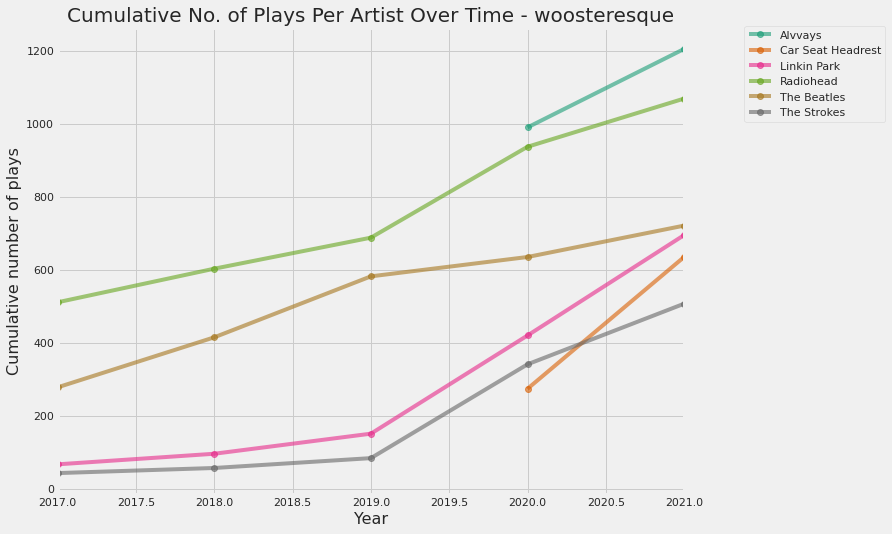

In [840]:
fig, ax = plt.subplots(figsize=[10, 8])
lines = []
for artist, c in zip(top_artists, colors):
    ax = plays[artist].plot(kind='line', linewidth=4, alpha=0.6, marker='o', c=c)
    lines.append(artist)
    
ax.set_xlim((plays.index.get_level_values(1).min(), plays.index.get_level_values(1).max()))

ax.yaxis.grid(True)
# ax.set_xticklabels(plays.index.levels[1], rotation=0, rotation_mode='anchor', ha='center')
ax.set_ylabel('Cumulative number of plays', fontproperties=label_font)
ax.set_xlabel('Year', fontproperties=label_font)
ax.set_title(f'Cumulative No. of Plays Per Artist Over Time - {username}', fontproperties=title_font)
ax.legend(lines, loc='upper right', bbox_to_anchor=(1.33, 1.016))

plt.savefig(f'images/{username}/scrobbles-top-artists-years-{username}.png', dpi=96, bbox_inches='tight')
plt.show()

In [821]:
artists_clean = scrobbles['artist'].str.replace('The ','').str.replace('A ', '')
first_letters = pd.Series(artists_clean.unique()).map(lambda x: x.upper()[0]).value_counts()
first_letters = first_letters[[c for c in string.ascii_uppercase]]

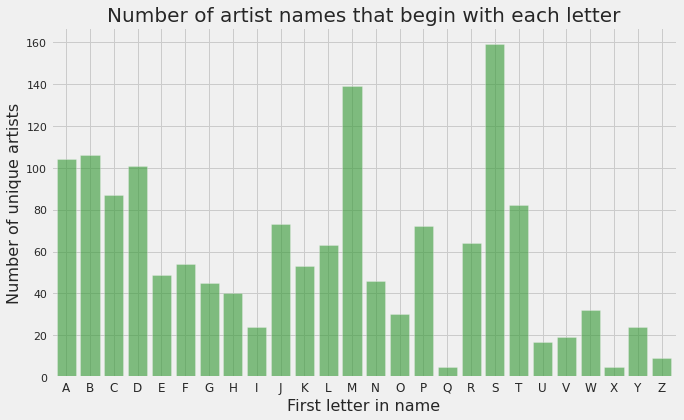

In [822]:
ax = first_letters.plot(kind='bar', figsize=[10,6], width = 0.8, alpha=0.6, color='#339933', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(first_letters.index, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)

ax.set_title('Number of artist names that begin with each letter', fontproperties=title_font)

ax.set_xlabel('First letter in name', fontproperties=label_font)
ax.set_ylabel('Number of unique artists', fontproperties=label_font)

plt.savefig(f'images/{username}/artists-first-letter-count-{username}.png', dpi=96, bbox_inches='tight')

plt.show()

In [823]:
n = 50
name_lengths = pd.Series([len(artist) for artist in artists_clean.unique()])
name_lengths = name_lengths.value_counts().sort_index()
name_lengths = name_lengths.iloc[0:n+1].reindex(range(n+1), fill_value=0)

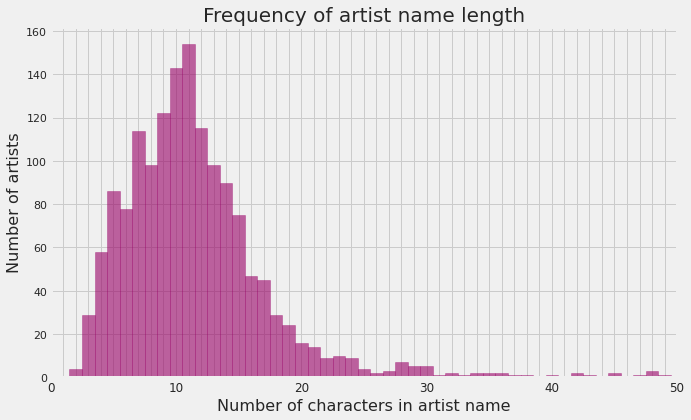

In [824]:
ax = name_lengths.plot(kind='bar', figsize=(10,6), alpha=0.6, width=1, color='#990066', edgecolor='#990066', zorder=2)

xlabels = [x if x % 10 == 0 else '' for x in name_lengths.index]
ax.set_xticklabels(xlabels, rotation=0, rotation_mode='anchor', ha='center', fontproperties=ticks_font)
ax.yaxis.grid(True)
ax.set_xlim((0,n))

ax.set_title('Frequency of artist name length', fontproperties=title_font)
ax.set_xlabel('Number of characters in artist name', fontproperties=label_font)
ax.set_ylabel('Number of artists', fontproperties=label_font)

plt.savefig(f'images/{username}/artists-name-length-{username}.png', dpi=96, bbox_inches='tight')
plt.show()